# **Tentang Dataset**

Ini adalah kumpulan data yang digunakan dalam bab kedua buku terbaru Aurélien Géron 'Pembelajaran Mesin Praktis dengan Scikit-Learn dan TensorFlow'. Ini berfungsi sebagai pengantar yang sangat baik untuk mengimplementasikan algoritma pembelajaran mesin karena memerlukan pembersihan data dasar, memiliki daftar variabel yang mudah dipahami, dan berada pada ukuran optimal antara terlalu rumit dan terlalu rumit.


Data tersebut berisi informasi dari sensus California tahun 1990. Jadi, meskipun data tersebut mungkin tidak membantu Anda memprediksi harga perumahan saat ini seperti kumpulan data Zillow Zestimate, data tersebut menyediakan kumpulan data pengantar yang mudah diakses untuk mengajarkan orang-orang tentang dasar-dasar pembelajaran mesin.


Isi
Data tersebut berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa statistik ringkasan tentang rumah-rumah tersebut berdasarkan data sensus tahun 1990. Perlu diingat bahwa data tersebut tidak dibersihkan sehingga diperlukan beberapa langkah praproses!

# DATA LOADING

In [39]:
import os,sys,warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

import numpy as np
from numpy.linalg import pinv,inv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
%matplotlib inline

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, RegressorMixin,ClassifierMixin
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Memuat dataset
df = pd.read_csv('/content/drive/MyDrive/dataset_predictive_analytics/housing.csv')

# Menampilkan 5 baris pertama dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

## 1. EDA - Deskripsi Variabel

In [43]:
print(f"\nJumlah baris dan kolom: {df.shape}")


Jumlah baris dan kolom: (20640, 10)


In [44]:
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
print("\nStatistik Deskriptif:")
display(df.describe(include='all'))


Statistik Deskriptif:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


## 2. EDA - Menangani Missing Value

In [46]:
# Menangani Data yang Hilang
missing_values = df.isnull().sum()
print("\nJumlah data yang hilang per kolom:\n", missing_values)


Jumlah data yang hilang per kolom:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Untuk kolom **total_bedrooms**, mengisi nilai hilang dengan median adalah pilihan yang paling kuat dan aman. Jika ada beberapa rumah dengan jumlah kamar tidur yang sangat tinggi atau sangat rendah yang bisa memengaruhi rata-rata, median akan memberikan nilai tengah yang lebih representatif.

In [49]:
# Mengisi nilai hilang di 'total_bedrooms' dengan median
median = df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
print("\nJumlah data yang hilang per kolom:\n", median)


Jumlah data yang hilang per kolom:
 None


In [50]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


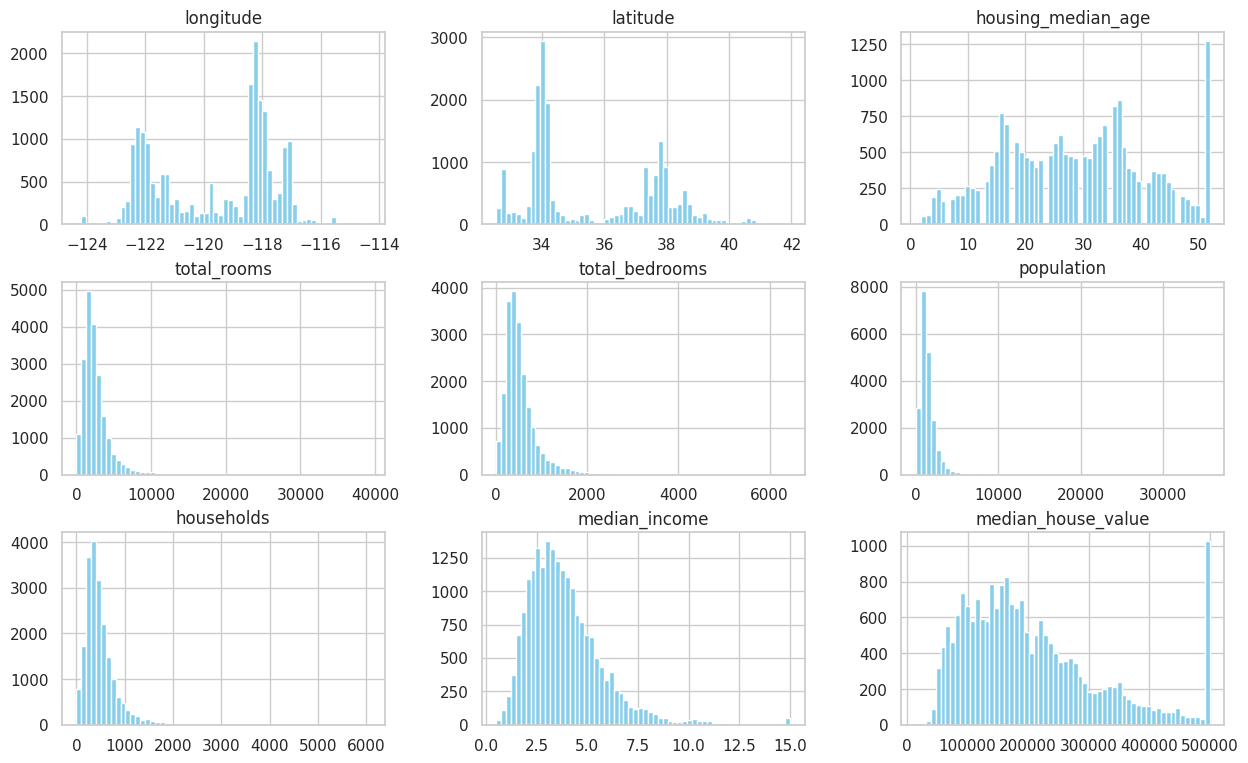

In [53]:
df.hist(bins=60, figsize=(15,9),color='skyblue');plt.show()

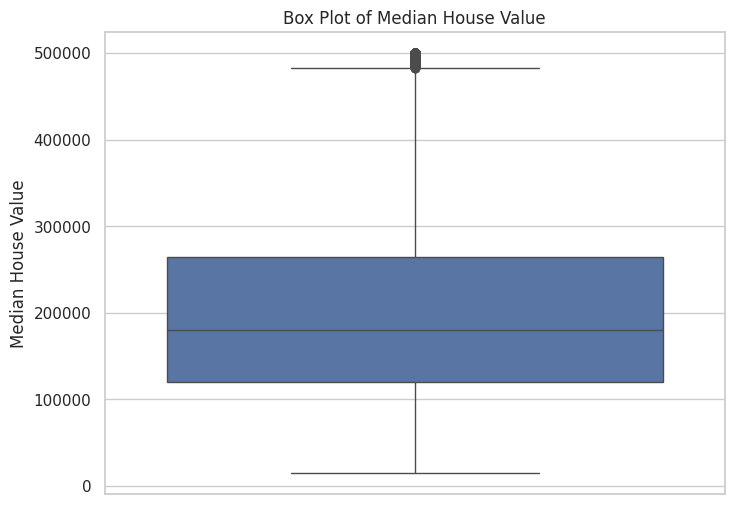

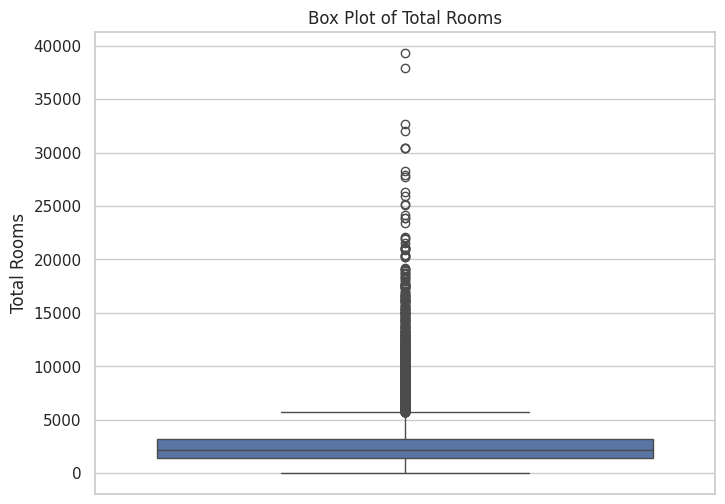

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['median_house_value']) # Untuk melihat outlier pada target variable
plt.title('Box Plot of Median House Value')
plt.ylabel('Median House Value')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['total_rooms']) # Untuk melihat outlier pada fitur
plt.title('Box Plot of Total Rooms')
plt.ylabel('Total Rooms')
plt.show()

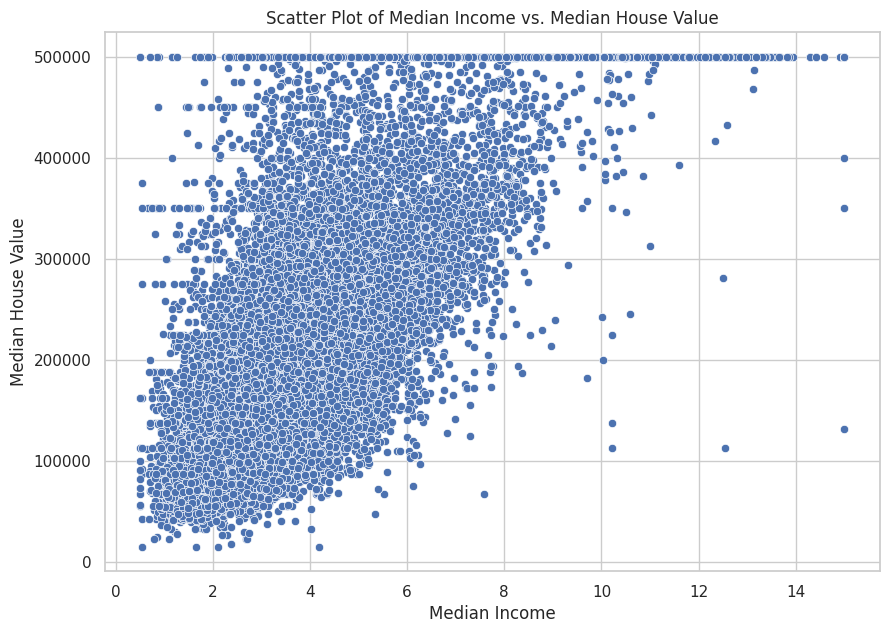

In [55]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

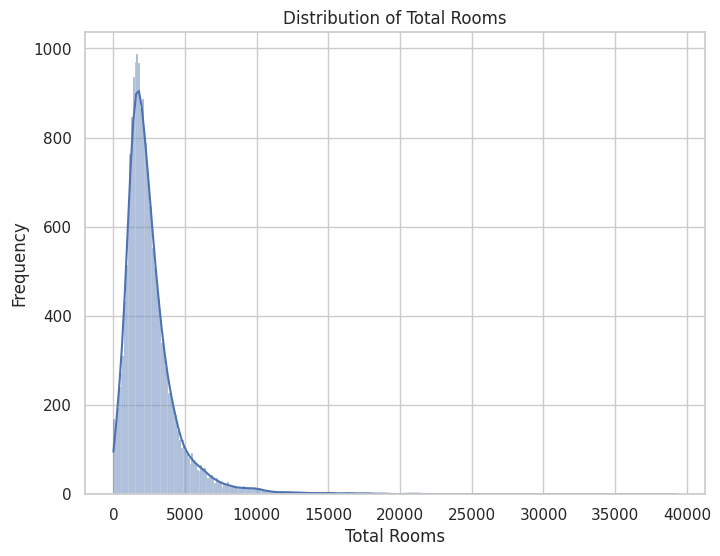

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_rooms'], kde=True)
plt.title('Distribution of Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.show()

In [58]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Dictionary untuk menyimpan jumlah outlier per kolom
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    # Outlier adalah nilai yang kurang dari batas bawah ATAU lebih dari batas atas
    num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_counts[col] = num_outliers

# Tampilkan hasil
print("\nJumlah Outlier per Kolom Numerik (Metode IQR):")
for col, count in outlier_counts.items():
    percentage = (count / df.shape[0]) * 100
    print(f"- {col}: {count} outliers ({percentage:.2f}%)")


Jumlah Outlier per Kolom Numerik (Metode IQR):
- longitude: 0 outliers (0.00%)
- latitude: 0 outliers (0.00%)
- housing_median_age: 0 outliers (0.00%)
- total_rooms: 1287 outliers (6.24%)
- total_bedrooms: 1306 outliers (6.33%)
- population: 1196 outliers (5.79%)
- households: 1220 outliers (5.91%)
- median_income: 681 outliers (3.30%)
- median_house_value: 1071 outliers (5.19%)


In [59]:
# 1. Transformasi variabel target
df['median_house_value_log'] = np.log1p(df['median_house_value'])

# 2. Transformasi fitur-fitur yang memiliki outlier
# Anda perlu memastikan kolom-kolom ini tidak memiliki nilai negatif sebelum transformasi logaritmik
# Kolom-kolom ini biasanya adalah jumlah/kuantitas, jadi seharusnya tidak negatif.
df['total_rooms_log'] = np.log1p(df['total_rooms'])
df['total_bedrooms_log'] = np.log1p(df['total_bedrooms'])
df['population_log'] = np.log1p(df['population'])
df['households_log'] = np.log1p(df['households'])
df['median_income_log'] = np.log1p(df['median_income']) # Ini juga seringkali skewed

# Setelah transformasi, Anda akan menggunakan kolom-kolom _log ini untuk pemodelan
# Dan saat mengevaluasi, kembalikan prediksi 'median_house_value_log' ke skala aslinya:
# predicted_value_original_scale = np.expm1(predicted_log_value)

## 3. EDA - Multivariate Analysis

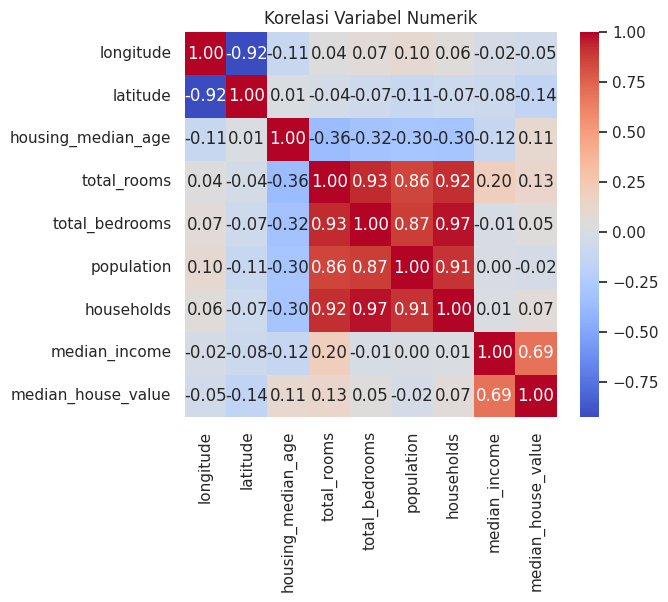

In [61]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Variabel Numerik')
plt.show()

# DATA PREPARATION

In [62]:
# --- 1. Penanganan Missing Values: Kolom 'total_bedrooms' ---
print("\n--- Tahap 1: Penanganan Missing Values ---")
print("Jumlah missing values sebelum imputasi:")
print(df.isnull().sum()[df.isnull().sum() > 0])

median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

print("\nJumlah missing values setelah imputasi:")
print(df.isnull().sum()[df.isnull().sum() > 0]) # Ini seharusnya kosong sekarang jika hanya total_bedrooms yang ada missing value

# Verifikasi bahwa tidak ada lagi nilai hilang di total_bedrooms
print(f"Missing values in 'total_bedrooms' filled with median: {median_total_bedrooms}")


--- Tahap 1: Penanganan Missing Values ---
Jumlah missing values sebelum imputasi:
Series([], dtype: int64)

Jumlah missing values setelah imputasi:
Series([], dtype: int64)
Missing values in 'total_bedrooms' filled with median: 435.0


In [63]:
# --- 2. Penanganan Outlier & Normalisasi Distribusi (Transformasi Logaritmik) ---
print("\n--- Tahap 2: Transformasi Logaritmik ---")

# Kolom-kolom yang akan ditransformasi logaritmik (berdasarkan EDA dan outlier analysis)
log_transform_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target_variable = 'median_house_value'

# Terapkan transformasi logaritmik pada fitur-fitur
for col in log_transform_features:
    df[col + '_log'] = np.log1p(df[col])
    print(f"Transformasi logaritmik diterapkan pada: {col}")

# Terapkan transformasi logaritmik pada variabel target
df[target_variable + '_log'] = np.log1p(df[target_variable])
print(f"Transformasi logaritmik diterapkan pada variabel target: {target_variable}")



--- Tahap 2: Transformasi Logaritmik ---
Transformasi logaritmik diterapkan pada: total_rooms
Transformasi logaritmik diterapkan pada: total_bedrooms
Transformasi logaritmik diterapkan pada: population
Transformasi logaritmik diterapkan pada: households
Transformasi logaritmik diterapkan pada: median_income
Transformasi logaritmik diterapkan pada variabel target: median_house_value


In [64]:
# --- 3. Pemisahan Fitur (X) dan Target (y) dan Train-Test Split ---
print("\n--- Tahap 3: Pemisahan Fitur dan Train-Test Split ---")

# Definisikan fitur numerik dan kategorikal yang akan digunakan dalam model
# Ingatlah untuk menggunakan kolom yang sudah di-log transform untuk fitur numerik yang relevan
numeric_features = ['longitude', 'latitude', 'housing_median_age'] + [col + '_log' for col in log_transform_features]
categorical_features = ['ocean_proximity']

# Gabungkan semua fitur
X = df[numeric_features + categorical_features]
y = df[target_variable + '_log'] # Gunakan variabel target yang sudah di-log transform

print(f"Fitur (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


--- Tahap 3: Pemisahan Fitur dan Train-Test Split ---
Fitur (X) shape: (20640, 9)
Target (y) shape: (20640,)
X_train shape: (16512, 9)
X_test shape: (4128, 9)
y_train shape: (16512,)
y_test shape: (4128,)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 4. Encoding Fitur Kategorikal dan Feature Scaling ---
print("\n--- Tahap 4: Encoding dan Feature Scaling ---")

# Tentukan transformer untuk kolom numerik dan kategorikal
# StandardScaler untuk fitur numerik
numeric_transformer = StandardScaler()

# OneHotEncoder untuk fitur kategorikal (handle_unknown='ignore' untuk kategori yang tidak terlihat di train set)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Buat preprocessor menggunakan ColumnTransformer
# Ini akan menerapkan StandardScaler pada numeric_features dan OneHotEncoder pada categorical_features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessor (ColumnTransformer) created.")
print(preprocessor)

# Terapkan preprocessor pada data training dan testing
# Ini akan melakukan fit (pelajari statistik) pada X_train dan transform (terapkan) pada X_train dan X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

# Opsional: Jika Anda ingin melihat nama fitur setelah transformasi
# feature_names_out = preprocessor.get_feature_names_out()
# print("\nNama fitur setelah pre-processing:")
# print(feature_names_out[:5]) # Tampilkan beberapa nama fitur pertama


--- Tahap 4: Encoding dan Feature Scaling ---
Preprocessor (ColumnTransformer) created.
ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms_log', 'total_bedrooms_log',
                                  'population_log', 'households_log',
                                  'median_income_log']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity'])])
X_train_processed shape: (16512, 13)
X_test_processed shape: (4128, 13)


# MODEL DEVELOPMENT

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Akan digunakan di tahap Evaluation

print("\n--- Tahap Modeling Dimulai ---")

# --- Model 1: Linear Regression ---
print("\n--- Melatih Model Linear Regression ---")
model_lr = LinearRegression()
model_lr.fit(X_train_processed, y_train)

# Membuat prediksi
y_pred_lr_log = model_lr.predict(X_test_processed)
# Inverse transform prediksi ke skala asli
y_pred_lr_original_scale = np.expm1(y_pred_lr_log)

print("Model Linear Regression berhasil dilatih dan prediksi dibuat.")

# --- Model 2: Random Forest Regressor ---
print("\n--- Melatih Model Random Forest Regressor ---")
# n_estimators bisa disesuaikan, 100 adalah titik awal yang baik
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 untuk menggunakan semua core CPU
model_rf.fit(X_train_processed, y_train)

# Membuat prediksi
y_pred_rf_log = model_rf.predict(X_test_processed)
# Inverse transform prediksi ke skala asli
y_pred_rf_original_scale = np.expm1(y_pred_rf_log)

print("Model Random Forest Regressor berhasil dilatih dan prediksi dibuat.")

# Siapkan y_test_original_scale untuk evaluasi
y_test_original_scale = np.expm1(y_test)

print("\n--- Tahap Modeling Selesai ---")
print("Variabel hasil prediksi (dalam skala asli):")
print("  - y_pred_lr_original_scale")
print("  - y_pred_rf_original_scale")
print("Variabel target asli untuk evaluasi:")
print("  - y_test_original_scale")


--- Tahap Modeling Dimulai ---

--- Melatih Model Linear Regression ---
Model Linear Regression berhasil dilatih dan prediksi dibuat.

--- Melatih Model Random Forest Regressor ---
Model Random Forest Regressor berhasil dilatih dan prediksi dibuat.

--- Tahap Modeling Selesai ---
Variabel hasil prediksi (dalam skala asli):
  - y_pred_lr_original_scale
  - y_pred_rf_original_scale
Variabel target asli untuk evaluasi:
  - y_test_original_scale


# EVALUATION MODEL

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Untuk np.sqrt

print("\n--- Tahap Evaluation Dimulai ---")

# --- Evaluasi Model 1: Linear Regression ---
print("\n--- Evaluasi Linear Regression ---")

# Menghitung MSE
mse_lr = mean_squared_error(y_test_original_scale, y_pred_lr_original_scale)
print(f"Mean Squared Error (MSE) - Linear Regression: {mse_lr:.2f}")

# Menghitung RMSE
rmse_lr = np.sqrt(mse_lr)
print(f"Root Mean Squared Error (RMSE) - Linear Regression: {rmse_lr:.2f}")

# Menghitung R-squared
r2_lr = r2_score(y_test_original_scale, y_pred_lr_original_scale)
print(f"R-squared (R2) - Linear Regression: {r2_lr:.2f}")


# --- Evaluasi Model 2: Random Forest Regressor ---
print("\n--- Evaluasi Random Forest Regressor ---")

# Menghitung MSE
mse_rf = mean_squared_error(y_test_original_scale, y_pred_rf_original_scale)
print(f"Mean Squared Error (MSE) - Random Forest: {mse_rf:.2f}")

# Menghitung RMSE
rmse_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error (RMSE) - Random Forest: {rmse_rf:.2f}")

# Menghitung R-squared
r2_rf = r2_score(y_test_original_scale, y_pred_rf_original_scale)
print(f"R-squared (R2) - Random Forest: {r2_rf:.2f}")

print("\n--- Ringkasan Hasil Evaluasi ---")
print("| Model                 | MSE        | RMSE       | R-squared (R2) |")
print("| :-------------------- | :--------- | :--------- | :------------- |")
print(f"| Linear Regression     | {mse_lr:.2f} | {rmse_lr:.2f} | {r2_lr:.2f}    |")
print(f"| Random Forest Regressor | {mse_rf:.2f} | {rmse_rf:.2f} | {r2_rf:.2f}    |")

print("\n--- Tahap Evaluation Selesai ---")


--- Tahap Evaluation Dimulai ---

--- Evaluasi Linear Regression ---
Mean Squared Error (MSE) - Linear Regression: 5285759704.38
Root Mean Squared Error (RMSE) - Linear Regression: 72703.23
R-squared (R2) - Linear Regression: 0.60

--- Evaluasi Random Forest Regressor ---
Mean Squared Error (MSE) - Random Forest: 2453584613.69
Root Mean Squared Error (RMSE) - Random Forest: 49533.67
R-squared (R2) - Random Forest: 0.81

--- Ringkasan Hasil Evaluasi ---
| Model                 | MSE        | RMSE       | R-squared (R2) |
| :-------------------- | :--------- | :--------- | :------------- |
| Linear Regression     | 5285759704.38 | 72703.23 | 0.60    |
| Random Forest Regressor | 2453584613.69 | 49533.67 | 0.81    |

--- Tahap Evaluation Selesai ---


**KESIMPULAN:**

1. Random Forest Jauh Lebih Baik: Jelas sekali bahwa Random Forest Regressor jauh mengungguli Linear Regression dalam semua metrik.

- RMSE Random Forest (49.533,67) jauh lebih rendah dibandingkan RMSE Linear Regression (72.703,23). Ini berarti rata-rata kesalahan prediksi Random Forest lebih kecil secara signifikan.
- R^2 Random Forest (0.81) jauh lebih tinggi dibandingkan R^2 Linear Regression (0.60). Ini menunjukkan bahwa Random Forest mampu menjelaskan 81% variasi nilai rumah median, sementara Linear Regression hanya 60%. Ini adalah peningkatan yang substansial.

2. Efektivitas Data Preparation: Transformasi logaritmik dan feature scaling tampaknya sangat membantu, terutama bagi Random Forest. RMSE 49.533,67 berarti rata-rata kesalahan prediksi adalah sekitar $49.533. Ini adalah angka yang cukup baik mengingat rentang harga properti yang mungkin bervariasi.

3. Kesesuaian Algoritma: Hasil ini mengkonfirmasi hipotesis bahwa masalah prediksi harga rumah di dataset ini memiliki hubungan non-linier dan interaksi fitur yang kompleks, yang lebih baik ditangkap oleh algoritma ensemble berbasis pohon seperti Random Forest, daripada model linier sederhana. Kemampuan Random Forest yang lebih robust terhadap outlier dan multicollinearity juga terlihat dari performanya yang superior.